2a)
With Temporal Difference (TD) learning, as soon as you hit the familiar part of the route (the highway), the method starts to apply the knowledge from your previous experiences. It updates the expected commute times by considering the consistent parts of your journey (the highway to home stretch). This means that even though the start of the journey from the new office to the highway is new, the TD updates quickly adapt based on the latter part of the journey, which is well-known.

In contrast, Monte Carlo (MC) methods would only update after the entire commute is completed. This means that no learning happens until you reach home, and the updates do not benefit from the fact that half of your journey is already familiar.

In this new scenario, TD updates are likely to be much better initially because they can immediately start improving predictions for the commute as soon as you hit the familiar part of the journey. The MC method, however, has to wait until the end of the trip and thus learns more slowly.

In the original scenario where you commute from the old office, since both methods are learning from scratch and every part of the journey is familiar, the advantage of TD learning might not be as pronounced. The "neighbor" states in TD updates would have estimates just as noisy as those in MC updates because they are all based on the same amount of experience. But in the new scenario, with partial familiarity, TD has the edge due to its ability to learn incrementally and apply past knowledge to the familiar segments of the trip.

2b)
Yes, there are situations where the Monte Carlo (MC) approach might be better than Temporal Difference (TD) learning.

Consider a card game like blackjack, where the outcome is only known at the end of the game. The rewards are delayed until the player either wins or loses the hand. Here, MC methods can effectively learn the value of different decisions because they wait until the hand is completed and the reward is known. This allows for an unbiased estimate of the state values since the reward is not dependent on potentially inaccurate intermediate estimates.

In contrast, TD methods might update their estimates based on incomplete games, potentially leading to biased estimates if the intermediate states are not representative of the true outcome. Since the outcome of blackjack is binary (win or lose) and only known at the end of the hand, the full trajectory of the game is important for learning accurate state values.

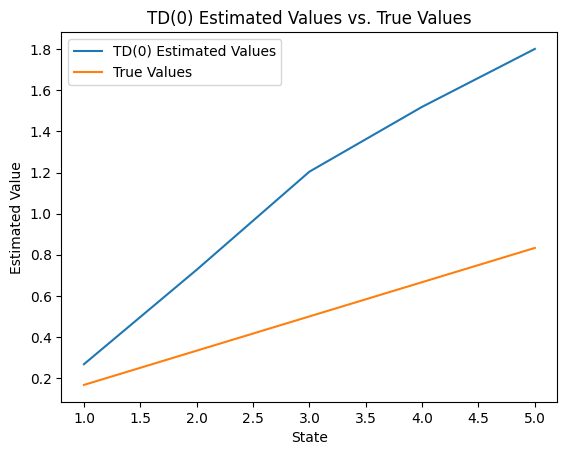

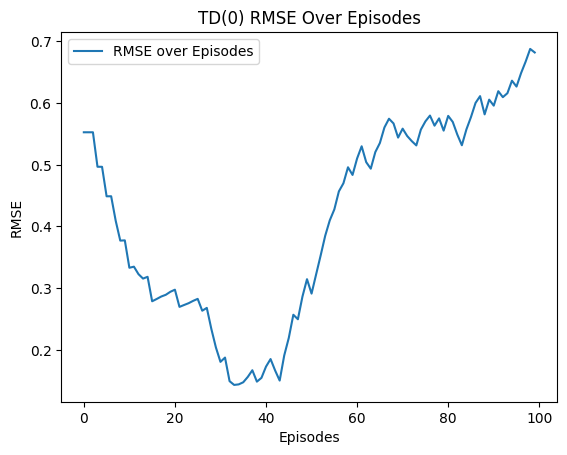

([3, 2, 3, 2, 1, 2, 3, 4, 3, 4, 5, 4, 5, 4, 3, 2, 3, 4, 3, 4, 3, 4, 5],
 -0.2325134247246674,
 0.6821885490623748)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the random walk
num_states = 5  # Number of non-terminal states
states = np.arange(1, num_states + 1)  # States A through E
start_state = 3  # Start from the middle state, C
left_terminal_state = 0  # Terminal state on the left
right_terminal_state = num_states + 1  # Terminal state on the right
state_values = np.zeros(num_states + 2)  # Value estimates for each state, including terminals
state_values[right_terminal_state] = 1  # Only the right terminal has a reward

# TD(0) parameters
alpha = 0.1  # Learning rate
gamma = 1  # Discount factor for future rewards
num_episodes = 100  # Total number of episodes to simulate

# Function to run a single episode
def run_episode_td0(state_values, alpha, gamma):
    current_state = start_state
    trajectory = []  # Track the states visited
    while current_state not in [left_terminal_state, right_terminal_state]:
        next_state = current_state + np.random.choice([-1, 1])  # Random walk step
        reward = 0 if next_state != right_terminal_state else 1  # Reward only for reaching the right terminal
        # TD(0) update
        state_values[current_state] = state_values[current_state] + alpha * (reward + gamma * state_values[next_state] - state_values[current_state])
        trajectory.append(current_state)
        current_state = next_state
    return trajectory

# Define a function to calculate the root-mean-square error (RMSE)
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Initialize state values for all states
state_values = np.zeros(num_states + 2)
state_values[right_terminal_state] = 1  # Set the right terminal state to 1

# Set the true values of each state based on the problem description
true_state_values = np.linspace(0, 1, num_states + 2)



# Run TD(0) for multiple episodes and collect the first episode trajectory
first_episode_trajectory = []
# Track the RMSE after each episode
rmse_values = []
for episode in range(num_episodes):
    # Run an episode of TD(0)
    first_episode_trajectory = run_episode_td0(state_values, alpha, gamma)
    # Calculate RMSE and store it
    current_rmse = rmse(state_values[1:-1], true_state_values[1:-1])
    rmse_values.append(current_rmse)

# Plot the estimated state values
plt.plot(states, state_values[1:-1], label='TD(0) Estimated Values')
plt.plot(states, true_state_values[1:-1], label='True Values')
plt.xlabel('State')
plt.ylabel('Estimated Value')
plt.legend()
plt.title('TD(0) Estimated Values vs. True Values')
plt.show()

# Plot the RMSE values over episodes
plt.plot(range(num_episodes), rmse_values, label='RMSE over Episodes')
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.legend()
plt.title('TD(0) RMSE Over Episodes')
plt.show()




# Analysis for (a)
# Change in V(A) after first episode
# Note: The states are 1-indexed here, so state A corresponds to index 1
change_in_V_A = state_values[1] - 0.5  # State A is the second state (index 1)

first_episode_trajectory, change_in_V_A, rmse_values[-1]

3b)

Small step-size: Because there are fewer updates to the value estimations, learning happens more slowly with a smaller step-size. This careful approach avoids overreacting to particular results, which may be advantageous in noisy circumstances. Nevertheless, it may take more time to converge to the genuine values, particularly when the environment or the starting estimates are unclear.

Large step-size:Greater learning speed and more substantial value estimation modifications are obtained with bigger step sizes. This can be useful in situations when rapid adaptation is required, but there is a chance that it will overestimate the true values or cause the estimates to fluctuate or diverge, particularly when noise or unpredictable results are present.


Using a larger range of alpha values may in fact influence the conclusions on which algorithm performs better. **The** "best" algorithm may change based on the selected alpha and the particular job and objectives (e.g., convergence speed vs. estimate stability). It is essential to conduct experiments with various alpha values in order to comprehend the trade-offs and determine the ideal parameters for every algorithm in a particular assignment. Furthermore, other variables like the initialization of state values, the gamma discount rate, and the particulars of the task environment can also have an impact on the performance of the TD and MC algorithms. Consequently, even though a different fixed alpha could provide advantages, the larger context and several parameter choices need be taken into account to draw comprehensive conclusions about the algorithms' relative effectiveness.

3c)

At high values of alpha, the updates to the value estimates after each step are larger. While this can speed up learning initially, it also increases the risk of overshooting the true value. If the updates are too aggressive, the value estimates might oscillate or diverge from the true values, leading to an increase in RMS error after initially decreasing as the estimates approach the true values.

The increase in RMS error at high alpha values observed in the TD method can be influenced by the aggressiveness of updates, the variance in the task, and the initial value estimates. Experimentation with different alpha values and initial conditions is essential to understand their impact fully. Adjusting
alpha dynamically during learning or employing techniques to reduce variance in updates (like averaging updates or using eligibility traces in TD(λ) methods) might help mitigate these effects.

In [2]:
#environment.py

from enum import IntEnum
from typing import Tuple, Optional, List
from gym import Env, spaces
from gym.utils import seeding
from gym.envs.registration import register
import random


def register_env() -> None:
    """Register custom gym environment so that we can use `gym.make()`

    In your main file, call this function before using `gym.make()` to use the Four Rooms environment.
        register_env()
        env = gym.make('FourRooms-v0')

    Note: the max_episode_steps option controls the time limit of the environment.
    You can remove the argument to make FourRooms run without a timeout.
    """
    register(id="FourRooms-v0", entry_point=__name__+":FourRoomsEnv", max_episode_steps=459)


class Action(IntEnum):
    """Action"""

    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3


def actions_to_dxdy(action: Action) -> Tuple[int, int]:
    """
    Helper function to map action to changes in x and y coordinates
    Args:
        action (Action): taken action
    Returns:
        dxdy (Tuple[int, int]): Change in x and y coordinates
    """
    mapping = {
        Action.LEFT: (-1, 0),
        Action.DOWN: (0, -1),
        Action.RIGHT: (1, 0),
        Action.UP: (0, 1),
    }
    return mapping[action]


class FourRoomsEnv(Env):
    """Four Rooms gym environment.

    This is a minimal example of how to create a custom gym environment. By conforming to the Gym API, you can use the same `generate_episode()` function for both Blackjack and Four Rooms envs.
    """

    def __init__(self, goal_pos=(10, 10)) -> None:
        self.rows = 11
        self.cols = 11
        self.max_steps = 459  # Maximum steps per episode
        self.current_step = 0  # Initialize step counter

        # Coordinate system is (x, y) where x is the horizontal and y is the vertical direction
        self.walls = [
            (0, 5),
            (2, 5),
            (3, 5),
            (4, 5),
            (5, 0),
            (5, 2),
            (5, 3),
            (5, 4),
            (5, 5),
            (5, 6),
            (5, 7),
            (5, 9),
            (5, 10),
            (6, 4),
            (7, 4),
            (9, 4),
            (10, 4),
        ]

        self.start_pos = (0, 0)
        self.goal_pos = goal_pos
        self.agent_pos = None

        self.action_space = spaces.Discrete(len(Action))
        self.observation_space = spaces.Tuple(
            (spaces.Discrete(self.rows), spaces.Discrete(self.cols))
        )
    def noise(self):

        r = random.random()
        if r <= 0.1:
            return 1  # denotes perpendicular direction 1
        elif r >= 0.9:
            return 2  # denotes perpendicular direction 2
        else:
            return 0  # denotes normal direction

    def seed(self, seed: Optional[int] = None) -> List[int]:
        """Fix seed of environment

        In order to make the environment completely reproducible, call this function and seed the action space as well.
            env = gym.make(...)
            env.seed(seed)
            env.action_space.seed(seed)

        This function does not need to be used for this assignment, it is given only for reference.
        """

        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self) -> Tuple[int, int]:
        self.current_step = 0  # Reset step counter
        """Reset agent to the starting position.

        Returns:
            observation (Tuple[int,int]): returns the initial observation
        """
        self.agent_pos = self.start_pos

        return self.agent_pos

    def step(self, action: Action) -> Tuple[Tuple[int, int], float, bool, dict]:
        """Take one step in the environment.

        Takes in an action and returns the (next state, reward, done, info).
        See https://github.com/openai/gym/blob/master/gym/core.py#L42-L58 foand r more info.

        Args:
            action (Action): an action provided by the agent

        Returns:
            observation (object): agent's observation after taking one step in environment (this would be the next state s')
            reward (float) : reward for this transition
            done (bool): whether the episode has ended, in which case further step() calls will return undefined results
            info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning). Not used in this assignment.
        """
        self.current_step += 1  # Increment step counter

        # Check if goal was reached
        if self.agent_pos == self.goal_pos:
            done = True
            reward = 1.0
        else:
            done = False
            reward = 0.0

        # TODO modify action_taken so that 10% of the time, the action_taken is perpendicular to action (there are 2 perpendicular actions for each action).
        # You can reuse your code from ex0

        n = self.noise()

        # Determines what action to take based on input action and noise
        if action == Action.UP:
            if n == 1:
                action_taken = Action.LEFT
            elif n == 2:
                action_taken = Action.RIGHT
            else:
                action_taken = Action.UP

        if action == Action.LEFT:
            if n == 1:
                action_taken = Action.DOWN
            elif n == 2:
                action_taken = Action.UP
            else:
                action_taken = Action.LEFT

        if action == Action.RIGHT:
            if n == 1:
                action_taken = Action.UP
            elif n == 2:
                action_taken = Action.DOWN
            else:
                action_taken = Action.RIGHT

        if action == Action.DOWN:
            if n == 1:
                action_taken = Action.RIGHT
            elif n == 2:
                action_taken = Action.LEFT
            else:
                action_taken = Action.DOWN
        # Check if maximum number of steps is reached
        if self.current_step >= self.max_steps:
            done = True  # End the episode
        else:
            done = self.agent_pos == self.goal_pos
        # TODO calculate the next position using actions_to_dxdy()
        # You can reuse your code from ex0
        move = actions_to_dxdy(action_taken)
        next_pos = (self.agent_pos[0] + move[0], self.agent_pos[1] + move[1])

        # TODO check if next position is feasible
        # If the next position is a wall or out of bounds, stay at current position
        # Set self.agent_pos
        if next_pos in self.walls:  # If next state is a wall, keep current state
            pass
        elif (next_pos[0] < 0) or (next_pos[0] > 10):  # If x coordinate is out of bounds, keep current state
            pass
        elif (next_pos[1] < 0) or (next_pos[1] > 10):  # If y coordinate is out of bounds, keep current state
            pass
        else:
            self.agent_pos = next_pos

        return self.agent_pos, reward, done, {}





In [3]:
import numpy as np
import gym
from collections import defaultdict
from typing import Callable, Tuple
from tqdm import trange

def pi_random_policy(env: gym.Env):
    action = env.action_space.sample()  # Randomly sample an action
    prob = 1 / env.action_space.n  # Probability of selecting any action is uniform
    return action, prob

def generate_episode(env: gym.Env, Q: defaultdict, policy: Callable, epsilon: float, es: bool = False):
    episode = []
    state = env.reset()
    done = False
    while not done:
        if policy == pi_random_policy:
            action, prob = pi_random_policy(env)
        else:
            action, prob = policy(Q, state, epsilon, env.action_space.n)

        next_state, reward, done, _ = env.step(action)
        episode.append((state, action, reward, prob))
        state = next_state

    return episode

def on_policy_mc_control_es(
    env: gym.Env, num_episodes: int, gamma: float, epsilon: float
) -> Tuple[defaultdict, Callable, list]:
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = defaultdict(list)
    policy = lambda Q, state, epsilon, nA: on_policy_epsilon_greedy(Q, state, epsilon, nA)
    episodes = []

    for _ in trange(num_episodes, desc="Episode"):
        episode = generate_episode(env, Q, policy, epsilon, es=True)
        episodes.append(episode)
        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward, prob = episode[t]
            G = gamma * G + reward
            # Check for first visit in episode
            if not (state, action) in [(x[0], x[1]) for x in episode[:t]]:
                returns[(state, action)].append(G)
                Q[state][action] = np.mean(returns[(state, action)])

    return Q, policy, episodes


def on_policy_epsilon_greedy(Q, state, epsilon, nA):
    A = np.ones(nA, dtype=float) * epsilon / nA
    best_action = np.argmax(Q[state])
    A[best_action] += (1.0 - epsilon)
    action = np.random.choice(a=nA, p=A)
    prob = A[action]
    return action, prob



def compute_greedy_policy(Q):
    policy = {}
    for state in Q:
        policy[state] = np.argmax(Q[state])
    return policy


def print_policy(policy, env):
    directions = ['←', '↓', '→', '↑']
    for y in range(env.rows):
        for x in range(env.cols):
            state = (x, y)
            if state in env.walls:  # If the current state is a wall
                print("█", end=" ")
            elif state == env.goal_pos:  # If the current state is the goal position
                print("G", end=" ")
            elif state == env.start_pos:  # If the current state is the start position
                print("S", end=" ")
            else:
                # Assuming policy is a dictionary with keys as (x, y) tuples
                # and values as the action index (cast to int if necessary)
                action = policy.get(state, None)
                if action is not None:
                    print(directions[int(action)], end=" ")  # Cast action to int
                else:
                    print("?", end=" ")  # If the policy for a state is unknown
        print()  # Newline at the end of each row

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
register_env()
env = gym.make('FourRooms-v0')  # Assuming the 'FourRooms-v0' environment is registered
Q, policy, episodes = on_policy_mc_control_es(env, num_episodes=10000, gamma=1.0, epsilon=0.1)
greedy_policy = compute_greedy_policy(Q)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: Us

In [5]:
print_policy(greedy_policy, env)

S ← ← ← ← █ ? ? ? ? ? 
← ← ← ← ← ? ? ? ? ? ? 
← ← ← ← ← █ ? ? ? ? ? 
← ← ← ← ← █ ? ? ? ? ? 
← ← ← ← ← █ █ █ ? █ █ 
█ ← █ █ █ █ ? ? ? ? ? 
← ← ← ← ? █ ? ? ? ? ? 
← ← ← ? ? █ ? ? ? ? ? 
← ← ← ← ? ? ? ? ? ? ? 
← ← ← ← ? █ ? ? ? ? ? 
← ← ← ← ← █ ? ? ? ? G 


In [6]:
num_episodes= 10000
epsilon = 0.1
random_episodes = [generate_episode(env, Q, pi_random_policy, epsilon) for _ in range(num_episodes)]


Predominance of Leftward Actions: The policy seems to have a strong preference for leftward actions. This could suggest that during the learning process, moving left was often part of a successful strategy to reach the goal, or it could indicate a bias in the learning process due to insufficient exploration.

Lack of Diversity in Actions: There appears to be a lack of varied actions, particularly in open spaces where you might expect more directional choices leading towards the goal. This could be a result of not running enough episodes to learn a more robust policy.

Possible Suboptimal Actions: If the goal (G) is at the bottom right of the grid, some actions, particularly those at the bottom row leading away from the goal, may seem suboptimal. However, if the agent starts in the bottom left corner, these leftward actions may actually be part of the shortest path to the goal due to the layout of the rooms and walls.

Effect of ε and Episode Count: Running only 1,000 episodes with an ε-greedy policy may not have allowed the agent to sufficiently explore the state space to learn the most efficient paths to the goal. An ε of 0.1 might also be too high if the environment is relatively deterministic and simple to navigate, leading to excessive exploration when exploitation would be more beneficial.

Impact of Environment Dynamics: The walls and room layout in the Four Rooms environment can create complex dynamics where the shortest path to the goal isn't always straightforward. The agent must learn to navigate around walls, which can lead to counterintuitive action choices.

In conclusion, the policy does show some potentially suboptimal choices, which might be improved by increasing the number of episodes for training, adjusting the value of ε to favor more exploitation over exploration, or using a more sophisticated method for policy improvement. It's also important to ensure that the Monte Carlo updates are implemented correctly and that the agent has a chance to visit all relevant states sufficiently to learn effective strategies.






In [7]:
def off_policy_mc_prediction(env, episodes, greedy_policy, gamma=1.0):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    C = defaultdict(lambda: np.zeros(env.action_space.n))  # Cumulative sum of weights

    for episode in episodes:
        G = 0
        W = 1  # Importance sampling ratio
        for t in reversed(range(len(episode))):
            state, action, reward, prob = episode[t]
            G = gamma * G + reward

            # Convert state from tuple to index if necessary
            state_index = state if not isinstance(state, tuple) else state[0] * env.cols + state[1]

            # If the action taken isn't the action under the greedy policy, exit the loop
            # Provide a default action for terminal state or use continue to skip it
            greedy_action = greedy_policy.get(state_index, None)
            if greedy_action is None or action != greedy_action:
                continue

            # Update weighted importance sampling formula denominator
            C[state_index][action] += W
            # Update the action-value function using the incremental formula
            Q[state_index][action] += (W / C[state_index][action]) * (G - Q[state_index][action])

            # If the action taken isn't the action under the greedy policy, exit the loop
            if action != greedy_policy[state]:
                break

            # Update the weight for the next iteration
            W /= prob

    return Q


def q_to_v(Q, greedy_policy):
    V = defaultdict(float)
    for state, actions in Q.items():
        greedy_action = greedy_policy[state]
        V[state] = Q[state][greedy_action]
    return V


In [8]:
# Assuming `random_episodes` and `epsilon_greedy_episodes` are the episodes generated by the two policies
# and `greedy_policy` is the policy computed in part (b)

# Estimate Q-values for πgreedy using the episodes from πrandom
Q_from_random = off_policy_mc_prediction(env, random_episodes, greedy_policy)
V_from_random = q_to_v(Q_from_random, greedy_policy)

# Estimate Q-values for πgreedy using the episodes from the ε-greedy policy
Q_from_epsilon_greedy = off_policy_mc_prediction(env, episodes, greedy_policy)
V_from_epsilon_greedy = q_to_v(Q_from_epsilon_greedy, greedy_policy)

# Plotting function (re-using the plot_policy function from the previous messages)
print_policy(V_from_random, env)
print_policy(V_from_epsilon_greedy, env)


S ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? ? ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ █ █ ? █ █ 
█ ? █ █ █ █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? ? ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? G 
S ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? ? ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ █ █ ? █ █ 
█ ? █ █ █ █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? ? ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? G 


In [9]:
def generate_episode_from_greedy_policy(env, greedy_policy):
    episode = []
    state = env.reset()
    done = False
    while not done:
        action = greedy_policy[state]
        next_state, reward, done, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
    return episode

def on_policy_mc_prediction(env, greedy_policy, num_episodes, gamma):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns = defaultdict(list)

    for _ in trange(num_episodes, desc="Episode"):
        episode = generate_episode_from_greedy_policy(env, greedy_policy)
        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward
            if (state, action) not in [(x[0], x[1]) for x in episode[:t]]:
                returns[(state, action)].append(G)
                Q[state][action] = np.mean(returns[(state, action)])
    return Q

def derive_v_from_q(Q):
    V = defaultdict(float)
    for state, actions in Q.items():
        V[state] = np.max(actions)
    return V



In [10]:
# Assuming greedy_policy has been defined in previous steps and is available here
num_episodes = 10000  # 10^4 episodes
gamma = 1.0  # Discount factor

# Generate episodes and estimate Q-values
Q_greedy = on_policy_mc_prediction(env, greedy_policy, num_episodes, gamma)

# Derive V-values from Q-values
V_greedy = derive_v_from_q(Q_greedy)



Episode: 100%|██████████| 10000/10000 [03:56<00:00, 42.27it/s]


In [11]:
print_policy(V_greedy, env)

S ? ? ? ? █ ? ? ? ? ? 
← ? ? ? ? ? ? ? ? ? ? 
← ? ? ? ? █ ? ? ? ? ? 
← ? ? ? ? █ ? ? ? ? ? 
← ? ? ? ? █ █ █ ? █ █ 
█ ? █ █ █ █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? ? ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? ? 
? ? ? ? ? █ ? ? ? ? G 


3e) The on-policy Monte Carlo prediction using π greedy, is expected to provide the most reliable estimate of Vπ for πgreedy, but it requires that the greedy policy itself be well-explored, which might take many episodes. Off-policy methods allow for the use of data collected from different policies, which can be useful when such data is already available or when it is desirable to learn about multiple policies simultaneously. However, off-policy estimates are subject to higher variance and potential bias due to the importance sampling corrections necessary to adjust for the differences in policies.